In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def findPosition(label, h, w, firstpixel):
  idxA = [0,1]
  idx = label[0] if firstpixel else idxA[label[0]-1]
  p = []
  for i in range(h):
    for j in range(w):
      if label[i*w + j] == idxA[idx] and ((j == 0 and i == 0) or (i == 0 and j > 0 and label[i*w + j - 1] == idxA[idx-1]) or (j == 0 and i > 0 and label[(i - 1)*w + j] == idxA[idx-1]) or (label[i*w + j - 1] == idxA[idx-1] and label[(i - 1)*w + j] == idxA[idx-1])):
        p.append([j + 10,i + 30])
  return p

def addTextImage(resPosition, img):
  imageText = img.copy()
  for i in range(len(resPosition)):
    text = str(i)
    #org: Where you want to put the text
    org = resPosition[i]
    # write the text on the input image
    cv2.putText(imageText, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 1, color = (255,0,0))
  return imageText

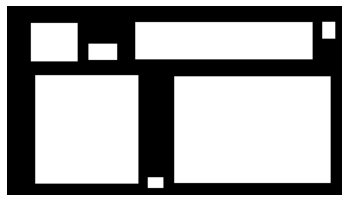

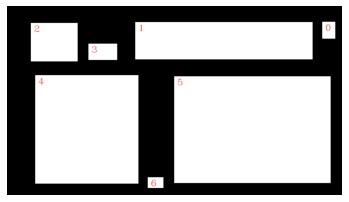

In [ ]:
#KMeans algo
img0 = mpimg.imread('/content/drive/MyDrive/CSToan/shape2.png')
plt.imshow(img0)
imgplot = plt.imshow(img0)
plt.axis('off')
plt.show()

X = img0.reshape((img0.shape[0]*img0.shape[1], img0.shape[2]))
K=2
kmeans = KMeans(n_clusters=K).fit(X)
label = kmeans.predict(X)
img4 = np.zeros_like(X)
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]
imageText = img4.reshape((img0.shape[0], img0.shape[1], img0.shape[2]))

#find Positions
resPosition = findPosition(label, img0.shape[0], img0.shape[1], firstpixel = False)
#let's write the text you want to put on the image
resImage = addTextImage(resPosition, imageText)

# display the output image with text over it
plt.imshow(resImage)
plt.axis('off')
plt.show()

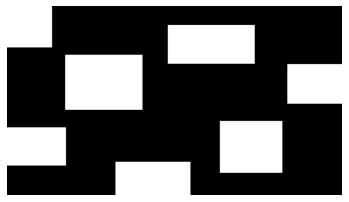

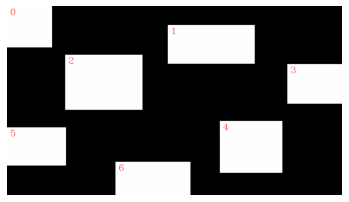

In [ ]:
#KMeans algo
img0 = mpimg.imread('/content/drive/MyDrive/CSToan/shape3.png')
plt.imshow(img0)
imgplot = plt.imshow(img0)
plt.axis('off')
plt.show()

X = img0.reshape((img0.shape[0]*img0.shape[1], img0.shape[2]))
K=2
kmeans = KMeans(n_clusters=K).fit(X)
label = kmeans.predict(X)
img4 = np.zeros_like(X)
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]
imageText = img4.reshape((img0.shape[0], img0.shape[1], img0.shape[2]))

#find Positions
resPosition = findPosition(label, img0.shape[0], img0.shape[1], firstpixel = True)
#let's write the text you want to put on the image
resImage = addTextImage(resPosition, imageText)

# display the output image with text over it
plt.imshow(resImage)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

img0 = mpimg.imread('/content/drive/MyDrive/CSToan/shape2.png')
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
# X = img0.reshape((img0.shape[0]*img0.shape[1], img0.shape[2]))
X = np.float32(gray.reshape((img0.shape[0]*img0.shape[1], 1)))
print(X.shape)

clustering = DBSCAN(eps=0.01, min_samples=2).fit(X)
clustering.labels_
# plt.imshow(gray, cmap = 'gray')
# plt.axis('off')
# plt.show()


(746496, 1)


[0, 35, 65, 71, 151, 233, 241, 192]


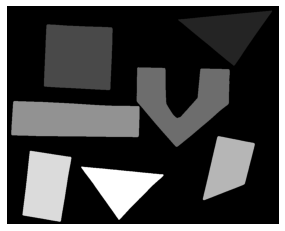

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import skimage.measure
import cv2 as cv

def hoshen_Kopelman(binaryImg):
    # Raster Scan and Labeling on the Grid
    largest_label = 0
    n_rows = len(binaryImg)
    n_columns = len(binaryImg[0])

    label = np.zeros((n_rows, n_columns), dtype=int)
    # print(n_columns*n_rows)
    # print(n_columns)
    # print(n_rows)
    labels = list(range(0, n_columns*n_rows)) #Array containing integers from 0 to the size of the image.

    # Find
    def find(x):
        y = x
        while (labels[y] != y):
            y = labels[y]
        while (labels[x] != x):
            z = labels[x]
            labels[x] = y
            x = z
        return y

    # Union
    def union(x, y):
        labels[find(x)] = find(y)

    for x in range(0, n_rows):
        for y in range(0, n_columns):
            if (binaryImg[x, y] > 0):
                left = label[x-1, y]
                above = label[x, y-1]
                if ((left == 0) and (above == 0)): # Neither a label above nor to the left.
                    largest_label = largest_label + 1 # Make a new, as-yet-unused cluster label.
                    label[x, y] = largest_label
                elif ((left != 0) and (above == 0)): #One neighbor, to the left.
                    label[x, y] = find(left)
                elif ((left == 0) and (above != 0)): #One neighbor, above.
                    label[x, y] = find(above)
                else: # Neighbors BOTH to the left and above.
                    union(left, above) # Link the left and above clusters.
                    label[x, y] = find(left)

    # print("largest_label: ")
    # print(largest_label)
    index_arr = [0]
    index_arr[0] = find(0)
    for i in range(largest_label):
        if find(i) not in index_arr:
            index_arr.append(labels[i])
    
    print(index_arr)
    
    idxImg = np.zeros((n_rows, n_columns), dtype=int)
    for x in range(0, n_rows):
        for y in range(0, n_columns):
            if (label[x, y] > 0):
                idxImg[x, y] = index_arr.index(find(label[x, y]))
    return idxImg



###############################################
#load img
img = cv.imread("/content/drive/MyDrive/CSToan/shape.jpeg", 2)#cv.IMREAD_GRAYSCALE
# print(img)
# cv2_imshow(img)
###############################################

###############################################
#filter noise
img_blur = cv.blur(img, (20,20))
###############################################

###############################################
#crop img
img_blur_c = cv.resize(img_blur, (1022, 819))
###############################################


###############################################
# convert rgb img to binary img 0 1"
binary_img = cv.inRange(img_blur_c, 0, 220)
# cv.imshow("binary_img", binary_img)
# cv.waitKey(0)
# cv.destroyAllWindows() 
for i, v1 in enumerate(binary_img):
    for j, v2 in enumerate(v1):
        if v2 == 255:
            binary_img[i, j] = 1
# print(binary_img)
################################################

label_img = hoshen_Kopelman(binary_img)

plt.imshow(label_img, cmap="gray")
plt.axis("off")
plt.show()